In [78]:
# Import the necessary packages to perform the data analysis

# packages to process and visualize the data
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# packages to improve visual description and analysis
from IPython.core import display as ICD
pd.set_option('display.max_columns', 100)
import os

Import the dataset of top 2000 companies

In [61]:
path='./data/'

In [62]:
os.listdir(path)

['panama_papers.nodes.address.csv',
 'API_SI.POV.GINI_DS2_en_csv_v2_10224868.csv',
 'panama_papers.nodes.entity.csv',
 'panama_papers.nodes.intermediary.csv',
 'panama_papers.edges.csv',
 'Human development index (HDI).csv',
 'panama_papers.nodes.officer.csv',
 'API_IC.TAX.TOTL.CP.ZS_DS2_en_csv_v2_10226097.csv']

Explore the gini coefficient data

In [6]:
df_edges_raw = pd.read_csv(path + 'panama_papers.edges.csv')
df_address_raw = pd.read_csv(path + 'panama_papers.nodes.address.csv')
df_entity_raw = pd.read_csv(path + 'panama_papers.nodes.entity.csv')
df_intermediary_raw = pd.read_csv(path + 'panama_papers.nodes.intermediary.csv')
df_officier_raw = pd.read_csv(path + 'panama_papers.nodes.officer.csv')

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_gini=pd.read_csv(path+'API_SI.POV.GINI_DS2_en_csv_v2_10224868.csv', skiprows=[0,1,2,3])

In [8]:
df_gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
years=range(1990, 2018)
years_count=np.array([])

for year in years:
    
    years_count=np.append(years_count,df_gini[str(year)].notnull().sum())
print ('Year with most data is', years[np.argmax(years_count)])

Year with most data is 2010


In [15]:
df_countries_gini=pd.DataFrame({'Country Name':df_gini['Country Name'][df_gini['2010'].notnull()],'Gini Coefficient':df_gini['2010'][df_gini['2010'].notnull()]})

In [16]:
df_countries_gini.head()

,Country Name,Gini Coefficient
7,Argentina,43.0
8,Armenia,30.0
11,Australia,34.7
12,Austria,30.3
15,Belgium,28.4


In [26]:
df_entity_raw.head()

,node_id,name,jurisdiction,jurisdiction_description,country_codes,countries,incorporation_date,inactivation_date,struck_off_date,closed_date,ibcRUC,status,company_type,service_provider,sourceID,valid_until,note
0,10000001,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",SAM,Samoa,HKG,Hong Kong,23-MAR-2006,18-FEB-2013,15-FEB-2013,NaN,25221,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
1,10000002,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",SAM,Samoa,HKG,Hong Kong,27-MAR-2006,27-FEB-2014,15-FEB-2014,NaN,25249,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
2,10000003,"HOTFOCUS CO., LTD.",SAM,Samoa,HKG,Hong Kong,10-JAN-2006,15-FEB-2012,15-FEB-2012,NaN,24138,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
3,10000004,"SKY-BLUE GIFTS & TOYS CO., LTD.",SAM,Samoa,HKG,Hong Kong,06-JAN-2006,16-FEB-2009,15-FEB-2009,NaN,24012,Defaulted,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN
4,10000005,FORTUNEMAKER INVESTMENTS CORPORATION,SAM,Samoa,HKG,Hong Kong,19-APR-2006,15-MAY-2009,15-FEB-2008,NaN,R25638,Changed agent,NaN,Mossack Fonseca,Panama Papers,The Panama Papers data is current through 2015,NaN


In [27]:
country_count=pd.DataFrame(df_entity_raw['countries'].value_counts())

In [41]:
country_count=country_count.rename(columns={'countries': 'n_companies_offshore'})
country_count['Country Name']=country_count.index
country_count=country_count.reset_index(drop=True)

In [42]:
country_count.head()

,n_companies_offshore,Country Name
0,37911,Switzerland
1,37911,Hong Kong
2,15811,Panama
3,14331,Jersey
4,10840,Luxembourg


In [45]:
country_count_gini=country_count.merge(df_countries_gini, how='inner',left_on='Country Name', right_on='Country Name')

In [48]:
country_count_gini.head()

,n_companies_offshore,Country Name,Gini Coefficient
0,37911,Switzerland,32.6
1,15811,Panama,51.7
2,10840,Luxembourg,30.5
3,9619,United Kingdom,34.4
4,4906,Uruguay,44.5


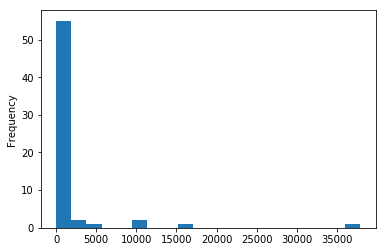

In [53]:
country_count_gini['n_companies_offshore'].plot()

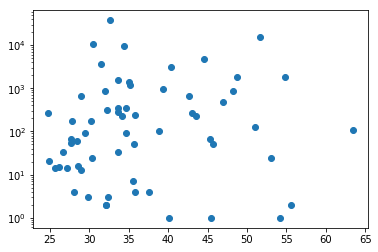

In [60]:
ax = plt.gca()
ax.scatter(country_count_gini['Gini Coefficient'],country_count_gini['n_companies_offshore'])
ax.set_yscale('log')

In [64]:
df_tax_weight=pd.read_csv(path+'API_IC.TAX.TOTL.CP.ZS_DS2_en_csv_v2_10226097.csv', skiprows=[0,1,2,3])

In [66]:
years=range(1990, 2018)
years_count=np.array([])

for year in years:
    
    years_count=np.append(years_count,df_tax_weight[str(year)].notnull().sum())
print ('Year with most data is', years[np.argmax(years_count)])

Year with most data is 2013


In [69]:
df_countries_tax=pd.DataFrame({'Country Name':df_tax_weight['Country Name'][df_tax_weight['2013'].notnull()],'Tax Rate':df_tax_weight['2013'][df_tax_weight['2013'].notnull()]})

In [70]:
df_countries_tax.head()

,Country Name,Tax Rate
1,Afghanistan,35.600000
2,Angola,52.600000
3,Albania,31.700000
5,Arab World,42.157143
6,United Arab Emirates,14.800000


In [71]:
country_count_tax_rate=country_count.merge(df_countries_tax, how='inner',left_on='Country Name', right_on='Country Name')

In [72]:
country_count_tax_rate.head()

,n_companies_offshore,Country Name,Tax Rate
0,37911,Switzerland,28.8
1,15811,Panama,37.0
2,10840,Luxembourg,20.4
3,9619,United Kingdom,34.7
4,7269,United Arab Emirates,14.8


/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


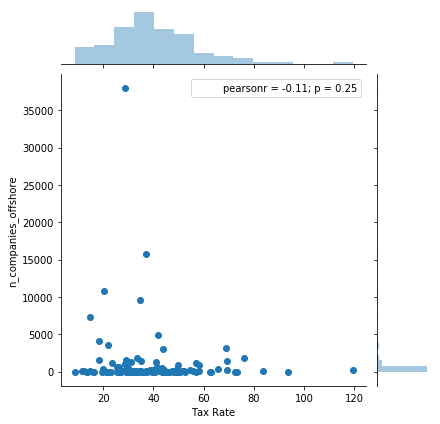

In [74]:
sns.jointplot(country_count_tax_rate['Tax Rate'],country_count_tax_rate['n_companies_offshore'])

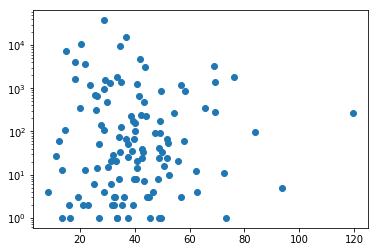

In [77]:
ax = plt.gca()
ax.scatter(country_count_tax_rate['Tax Rate'],country_count_tax_rate['n_companies_offshore'])
ax.set_yscale('log')

In [79]:
X=np.array([np.log10(country_count_tax_rate['n_companies_offshore']),country_count_tax_rate['Tax Rate']])

In [80]:
X

array([[  4.57876524,   4.19895934,   4.03502928,   3.98312992,
          3.86147467,   3.69072754,   3.61076659,   3.55786796,
          3.50691073,   3.48657215,   3.26810973,   3.26764098,
          3.20763437,   3.19117146,   3.14581771,   3.13987909,
          3.13065535,   3.09096308,   3.08529058,   3.06669855,
          2.98362629,   2.94743372,   2.94448267,   2.8344207 ,
          2.8299467 ,   2.82151353,   2.68663627,   2.68663627,
          2.54032947,   2.5390761 ,   2.50785587,   2.45484486,
          2.43775056,   2.43136376,   2.38560627,   2.36921586,
          2.34635297,   2.24797327,   2.2380461 ,   2.19865709,
          2.14612804,   2.10380372,   2.03342376,   2.02530587,
          2.00432137,   1.97772361,   1.97312785,   1.95424251,
          1.86332286,   1.81954394,   1.81291336,   1.81291336,
          1.77815125,   1.77085201,   1.74036269,   1.71600334,
          1.69897   ,   1.61278386,   1.60205999,   1.5563025 ,
          1.53147892,   1.53147892,   1.

In [84]:
clustering = DBSCAN(eps=0.1, min_samples=10).fit(X)
clustering.labels_

array([-1, -1])

COMMENT TO PUT AT THE END OF THE ANALYSIS

After exploring the data better we decided to focus our analysis on understanding what are the sociological reasons that determine whether companies in countries decide to put their holdings offshore.

** 1)** Firstly it has been found that companies which are in Panama Papers have already holdings in countries with low taxes
** 2)** The idea is to **understand the social and economical causes whihc push entities to have companies offshore**. For this reason the HDI, Total Tax rate, Gini Coefficient and Private sector indicator data from w
